# Scraping `zangia.mn`
* You need to import `pandas`, `requests` and `BeautifulSoup`

In [59]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import requests
from bs4 import BeautifulSoup
import statistics

### Exercise 1: Scrape `zangia.mn` page#1
* Make a dataframe using `Мэдээлэл технологи, Харилцаа холбоо` category `https://www.zangia.mn/job/list/pg.1/b.4`.
* Get job listings from page 1.
  * DataFrame should include columns: `job_title`, `salary`. 
  * Remove the row if `salary` text contains `Тохиролцоно`. 
    * *Hint*: Loop over the df and use `in` and `drop` methods.
  * Take salary as 5000000 if `salary` text contains `5,000,000 -ааc дээш`
  * Import statistics library
  * Get the median salary using statistics library if there is a salary range. Example: 2,500,000-3,500,000 should be 3000000. 
    * Use string replace method to remove comma from numbers.
    * *Hint*: Use string split method to get the numbers. 
  * Make a histogram plot using the `salary`.  


In [9]:
# Your code here
response = requests.get("https://www.zangia.mn/job/list/pg.1/b.4")

In [10]:
soup = BeautifulSoup(response.content)

In [36]:
ads = soup.find_all("div", {"class" : "ad"})

In [37]:
ads[0].find('b').get_text()

'ТӨЛӨВЛӨЛТИЙН ИНЖЕНЕР'

In [40]:
job_titles = [] 

for ad in ads:
    job_title = ad.find('b').get_text()
    job_titles.append(job_title) 

In [43]:
ads[0].find('span', class_="fsal").get_text()

'2,500,000 - 3,000,000'

In [47]:
job_salaries = [] 

for ad in ads:
    job_salary = ad.find('span', class_='fsal').get_text()
    job_salaries.append(job_salary)


In [52]:
data = {'job_titles': job_titles, 'job_salary': job_salaries}
df = pd.DataFrame(data)


In [53]:
df.head()

,job_titles,job_salary
0,ТӨЛӨВЛӨЛТИЙН ИНЖЕНЕР,"2,500,000 - 3,000,000"
1,Худалдааны зөвлөх,"1,500,000 - 1,800,000"
2,Оффис менежер,"1,500,000 - 1,800,000 Тохиролцоно"
3,ЦАГИЙН АЖИЛ /ТЭСО ИНВЕСТМЭНТ ХХК/,"500,000 - 600,000"
4,МЭДЭЭЛЭЛ ТЕХНОЛОГИЙН АЖИЛТАН,"1,500,000 - 1,800,000"


In [60]:
for i in range(len(df)):
    if "Тохиролцоно" in df['job_salary'][i]:
        df.drop(i, inplace= True)
        
    if "5,000,000 -ааc дээш" in df['job_salary'][i]:
        df['job_salary'][i] = 5_000_000

In [61]:
df = df.reset_index(drop=True)

In [63]:
df['job_salary'][0].split('-')[0].replace(',', '')

'2500000 '

In [65]:
import statistics

for i in range(len(df)):
    lower_sal = int(df['job_salary'][i].split('-')[0].replace(',', ''))
    upper_sal = int(df['job_salary'][i].split('-')[1].replace(',', '')) 
    
    median_sal = statistics.median([lower_sal, upper_sal])
    df['job_salary'][i] = median_sal


In [66]:
df

,job_titles,job_salary
0,ТӨЛӨВЛӨЛТИЙН ИНЖЕНЕР,2750000.00
1,Худалдааны зөвлөх,1650000.00
2,ЦАГИЙН АЖИЛ /ТЭСО ИНВЕСТМЭНТ ХХК/,550000.00
3,МЭДЭЭЛЭЛ ТЕХНОЛОГИЙН АЖИЛТАН,1650000.00
4,IT System Analyst,2750000.00
5,Холбоо дохиололийн инженер,1650000.00
6,Мэдээллийн аюулгүй байдлын шинжээч,3500000.00
7,Төслийн менежер,1650000.00
8,Төслийн менежер,1650000.00
9,ГРАФИК ДИЗАЙНЕР АЖИЛД АВНА.,2750000.00


<AxesSubplot:ylabel='Frequency'>

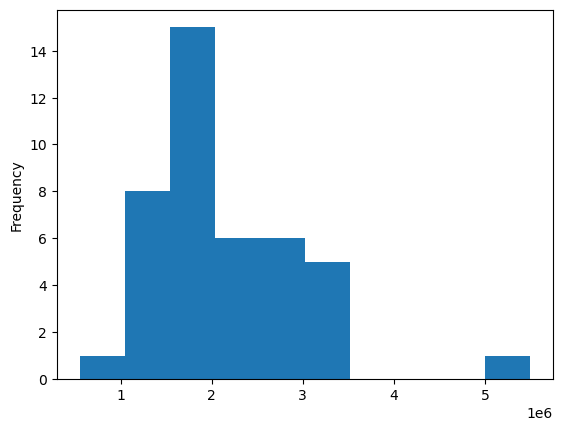

In [75]:
df['job_salary'].plot.hist()

### Exercise 2: Scrape `zangia.mn` Page#1 - Page#10
* Make a dataframe using `Мэдээлэл технологи, Харилцаа холбоо` category `https://www.zangia.mn/job/list/pg.1/b.4`.
* Get job listings from page 1-10. *Hint* Loop over the list of pages
* Make a dataframe and make a histogram plot using `salary` column.

In [ ]:
# Your code

response = requests.get("https://www.zangia.mn/job/list/pg.1/b.4")


#loop oruulah 1-10


### Exercise 3: Scrape `zangia.mn` Page#1 - Page#7
* Make a dataframe using `Захиргаа, Хүний нөөц` category `https://www.zangia.mn/job/list/pg.1/b.36`.
* Get job listings from page 1-7.
* Make a dataframe and make a histogram plot using `salary` column.

**WARNING** MAKE SURE YOUR LINKS ARE CORRECT!

In [ ]:
# Your code